![ModernHouseForSale](Images/Modern%20House%20for%20Sale.png)

**Authors**: 

**Date created**: 19-12-2023

**Discipline**: Data Science PT-05

# **Title:**

## Overview

## Business Problem

## Data Understanding

## Data Preparation

In [4]:
# importing standard packages

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from scipy import stats
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor



### Data Loading and Inspection

In [5]:
# Load and preview the dataset

data = pd.read_csv("Data/kc_house_data.csv")
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
# viewing the metadata of our 'data' df

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

### Dealing with Missing Values

In [7]:
# Summary of total missing values per column

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [8]:
data.view.unique()

array(['NONE', nan, 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [9]:
# View a sample of homes with null values for 'view'

null_views = data[data['view'].isna()]
null_views.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7,2008000270,1/15/2015,291850.0,3,1.50,1060,9711,1.0,NO,NaN,...,7 Average,1060,0.0,1963,0.0,98198,47.4095,-122.315,1650,9711
114,8961960160,10/28/2014,480000.0,4,2.50,3230,16171,2.0,NO,NaN,...,9 Better,2520,710.0,2001,0.0,98001,47.3183,-122.253,2640,8517
129,7853210060,4/6/2015,430000.0,4,2.50,2070,4310,2.0,NO,NaN,...,7 Average,2070,0.0,2004,0.0,98065,47.5319,-121.850,1970,3748
205,3456000310,8/4/2014,840000.0,4,1.75,2480,11010,1.0,NO,NaN,...,9 Better,1630,850.0,1966,NaN,98040,47.5378,-122.219,2770,10744
487,1895000260,7/21/2014,207950.0,2,2.00,890,5000,1.0,NO,NaN,...,6 Low Average,890,0.0,1917,0.0,98118,47.5158,-122.264,1860,5000


In [10]:
# Viewing coordinates on OpenStreetMap for Houses with null views

import folium
from folium.plugins import MarkerCluster

# Getting the average latitude

average_latitude = null_views.lat.mean()

# Getting average longitude

average_longitude = null_views.long.mean()

# Create a folium map centered around the average location
mymap = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Adding markers 

marker_cluster = MarkerCluster().add_to(mymap)

for index, row in null_views.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"House {index}").add_to(marker_cluster)


# display the map

mymap


In [11]:
# Checking the same for null values for Waterfront Column

null_waterfront = data[data['waterfront'].isna()]

# Getting the average latitude

average_latitude = null_waterfront.lat.mean()

# Getting average longitude

average_longitude = null_waterfront.long.mean()

# Create a folium map centered around the average location
mymap = folium.Map(location=[average_latitude, average_longitude], zoom_start=12)

# Adding markers 

marker_cluster = MarkerCluster().add_to(mymap)

for index, row in null_waterfront.iterrows():
    folium.Marker([row['lat'], row['long']], popup=f"House {index}").add_to(marker_cluster)


# display the map

mymap


Using a combination of the above interactive maps and sampling a few houses on Google Street View, it is apparent that
a vast majority of these units do not have a notable view/ waterfront. This suggests that the null values can be filled in accordingly. The assumption here is that it will not affect our analysis adversely.

In [12]:
# Filling missing values in the 'view' and 'waterfront' columns

data['waterfront'].fillna('NO', inplace=True)
data['view'].fillna('NONE', inplace=True)

# verifying the operation was successful

data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [13]:
data.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [14]:
data.yr_renovated.isna().sum()

3842

This particular column exhibits 3,842 missing values. Moreover, 17,011 entries indicate a 'yr_renovated' value of 0, presumably signifying that the residence underwent no renovation. Combined, these instances represent over 96% of the dataset. Instead of imputing these values with arbitrary numbers, a more informative approach would be to create a new column indicating whether the property underwent renovation in the decade preceding its sale.

In [15]:
yr_renovated = data["yr_renovated"]
yr_sold = data['date'].str[-4:].astype(int)
data['renovated_last_10'] = (yr_renovated >= (yr_sold - 10))
data['renovated_last_10'] = data['renovated_last_10'].map({True: 'Yes', False: 'No'})
# Keeping this as a string for now in order to group it with categorical variables later.
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,No
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,No
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,No
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,No
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,No


In [16]:
# dropping the 'yr_renovated' column from our DataFrame

data.drop('yr_renovated', axis=1, inplace=True)

In [21]:
# Verifying the column was successfully dropped

print(data.columns)

# Confirming no missing values are left in any of our columns

print(data.isna().sum())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'renovated_last_10'],
      dtype='object')
id                   0
date                 0
price                0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
renovated_last_10    0
dtype: int64


In [22]:
### Asserting that dtypes are correct

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 21597 non-null  int64  
 1   date               21597 non-null  object 
 2   price              21597 non-null  float64
 3   bedrooms           21597 non-null  int64  
 4   bathrooms          21597 non-null  float64
 5   sqft_living        21597 non-null  int64  
 6   sqft_lot           21597 non-null  int64  
 7   floors             21597 non-null  float64
 8   waterfront         21597 non-null  object 
 9   view               21597 non-null  object 
 10  condition          21597 non-null  object 
 11  grade              21597 non-null  object 
 12  sqft_above         21597 non-null  int64  
 13  sqft_basement      21597 non-null  object 
 14  yr_built           21597 non-null  int64  
 15  zipcode            21597 non-null  int64  
 16  lat                215

In [24]:
# Getting the columns of 'object' dtype

object_column_names = data.select_dtypes(include=['object']).columns.tolist()
object_column_names


['date',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_basement',
 'renovated_last_10']

For our analysis, it would be more suitable to convert the data type of the 'date' column to a datetime object and the 'sqft_basement' column to the float64 type.


In [26]:
# converting 'date' column to datetime object

data["date"] = pd.to_datetime(data.date)

In [28]:
# converting 'sqft_basement' to float64type

try:
    data['sqft_basement'] = data['sqft_basement'].astype('float64')
except ValueError as e:
    print(f"Error: {e}")


Error: could not convert string to float: '?'


In [29]:
# Investing the values within this column that are impeding the change

data.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
475.0         1
2050.0        1
1135.0        1
1816.0        1
2500.0        1
Name: sqft_basement, Length: 304, dtype: int64

It appears that 454 cells have this "?" symbol that's preventing the change to float64 datatype. Besides that, there are 12826 units with sqft_basement = 0.0. It is unclear whether these values mean:

- there is no basement
- there is a basement but it's unfinished
- something else

To avoid the risk of making false assumptions, this column shall be dropped

In [30]:
# dropping 'sqft_basement' column from our DataFrame

data.drop('sqft_basement', axis=1, inplace=True)

In [33]:
# confirming the column has been dropped

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 21597 non-null  int64         
 1   date               21597 non-null  datetime64[ns]
 2   price              21597 non-null  float64       
 3   bedrooms           21597 non-null  int64         
 4   bathrooms          21597 non-null  float64       
 5   sqft_living        21597 non-null  int64         
 6   sqft_lot           21597 non-null  int64         
 7   floors             21597 non-null  float64       
 8   waterfront         21597 non-null  object        
 9   view               21597 non-null  object        
 10  condition          21597 non-null  object        
 11  grade              21597 non-null  object        
 12  sqft_above         21597 non-null  int64         
 13  yr_built           21597 non-null  int64         
 14  zipcod

Converting **yr_built** to **Age**

In [39]:
data['Age'] = (data['date'] - pd.to_datetime(data['yr_built'], format='%Y')).dt.days // 365
data.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,renovated_last_10,Age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NO,NONE,...,7 Average,1180,1955,98178,47.5112,-122.257,1340,5650,No,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,1951,98125,47.7210,-122.319,1690,7639,No,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,1933,98028,47.7379,-122.233,2720,8062,No,82


**Bulk dropping Columns**

The listed variables either remain constant for home sellers or contribute limited valuable information.As for the 'date' variable, all homes in this dataset were sold within the timeframe of May 2014 to May 2015.

Variables:
- id
- date
- zipcode
- lat
- long
- sqft_living15
- sqft_lot15

In [40]:
# list the columns to drop
columns_to_drop = ['id',
                   'date',
                   'zipcode',
                   'lat',
                   'long',
                   'sqft_living15',
                   'sqft_lot15']
data.drop(columns_to_drop, axis=1, inplace=True)

In [41]:
#confirming successful operation
data.head(3)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,renovated_last_10,Age
0,221900.0,3,1.00,1180,5650,1.0,NO,NONE,Average,7 Average,1180,1955,No,59
1,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,1951,No,63
2,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,1933,No,82


### Dealing with Categorical Variables

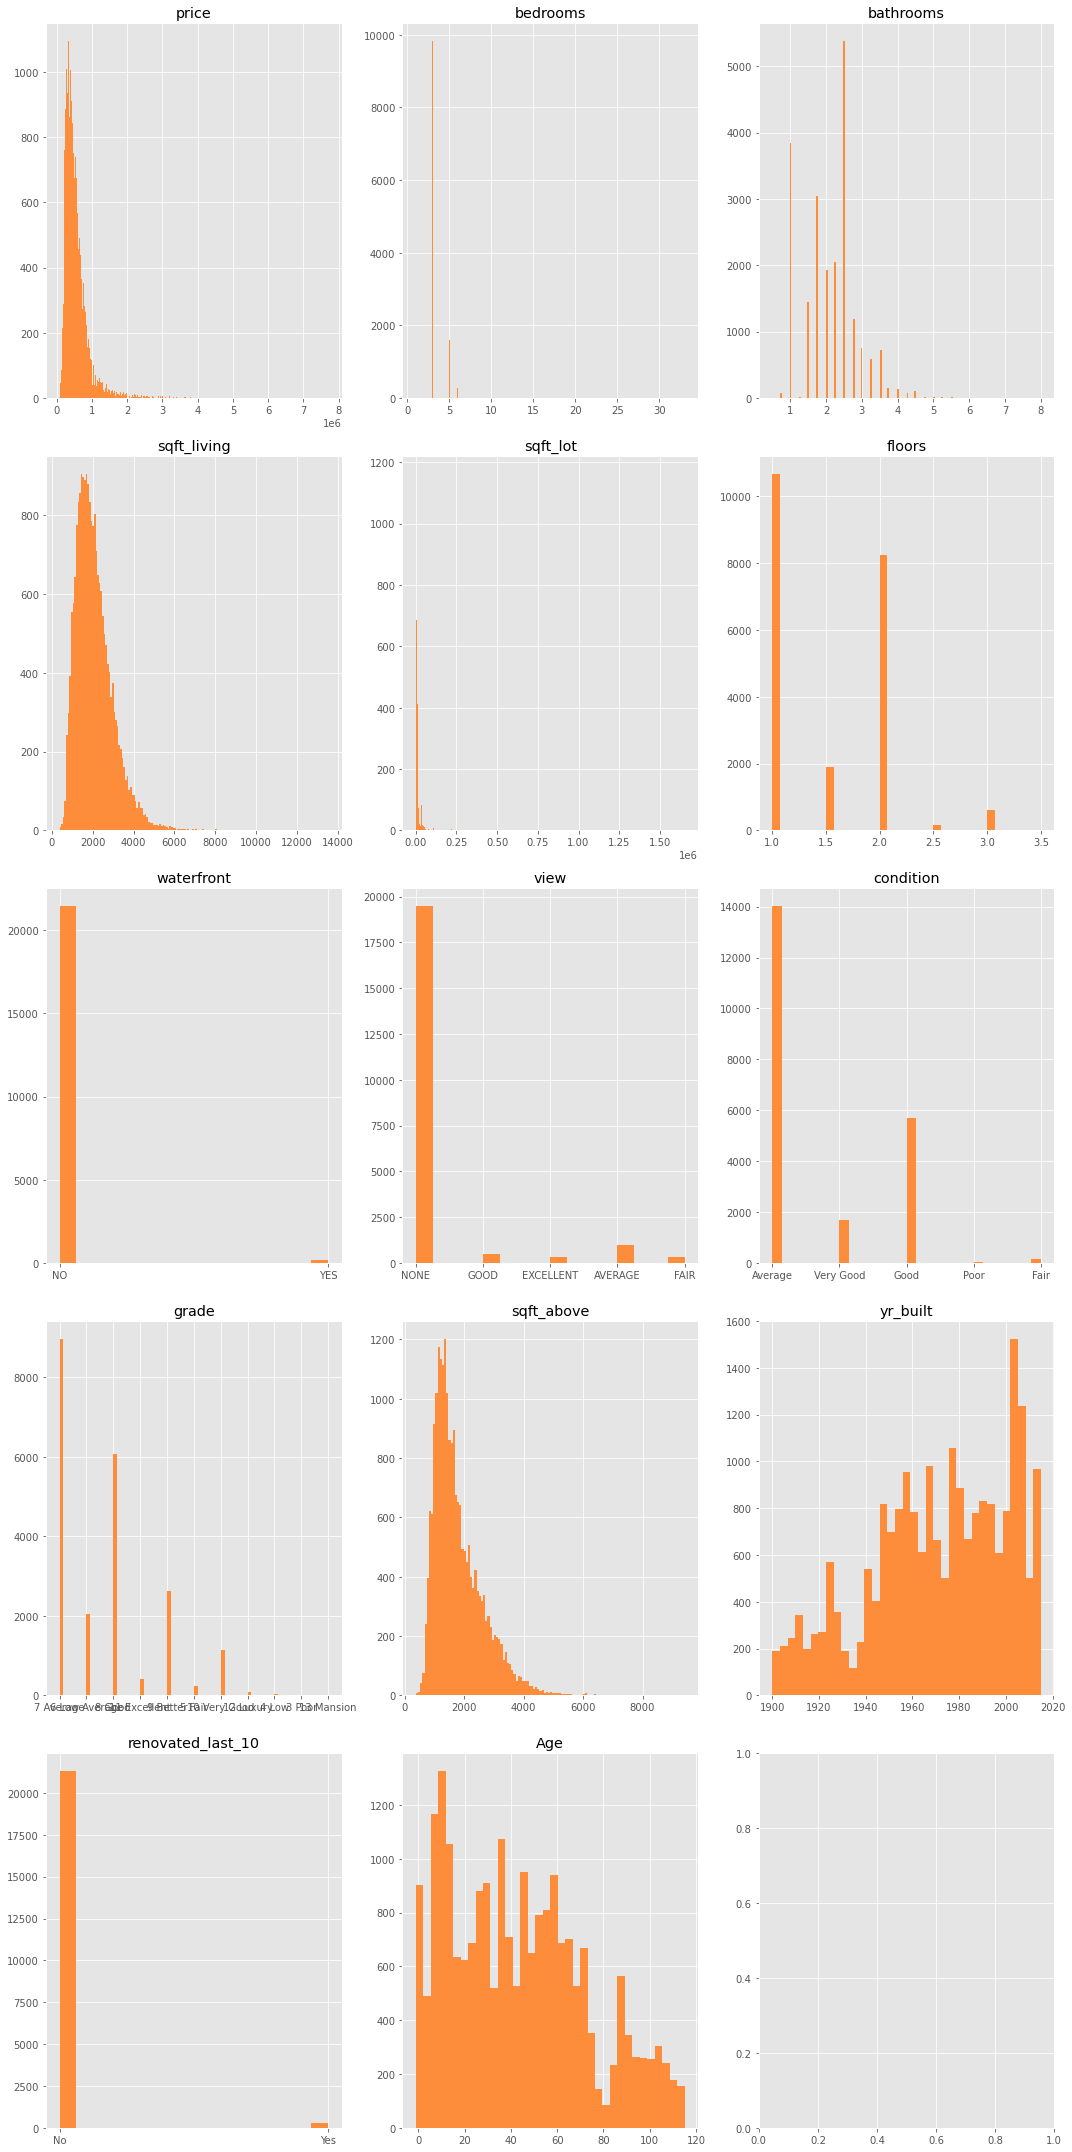

In [46]:
#Creating a histogram for each column of the dataframe:

fig, axes = plt.subplots(nrows=(5), ncols=3, figsize=(15,30))
df_cols = data.columns

color = sns.color_palette("Oranges", n_colors=1)[0]

for col, ax in zip(df_cols, axes.flatten()):
    ax.hist(data[col].dropna(), bins='auto', color=color )
    ax.set_title(col)
    
fig.tight_layout()

The histograms clearly show which features have continuous variables, and those that do not. Thus, the following shall be treated as categorical variables:

- bedrooms
- bathrooms
- floors
- waterfront
- view
- condition
- grade
- renovated_last_10

Eliminating Noise: If a category appears in the dataset less than 50 times, it will be dropped from the dataset

In [48]:
cats = ['bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'renovated_last_10']

for c in cats:
    # get value counts
    counts = data[c].value_counts()
    # Isolate offending categories for each variable
    bad_cats = counts[counts < 50].index
    # Isolate indices in the dataset where offending categories are found
    to_drop = data[data[c].isin(bad_cats)].index
    # Drop
    data.drop(to_drop, inplace=True)

According to the histograms of our variables, 'view' , 'revovated_last_10', and 'waterfront' can be binarized (using 1 & 0)


In [49]:
# Binarizing view
view_dict = {
    'FAIR': 1,
    'AVERAGE': 1,
    'GOOD': 1,
    'EXCELLENT': 1,
    'NONE': 0
}

data['view'] = data['view'].map(view_dict)

# Binarizing waterfront
waterfront_dict = {
    'YES': 1,
    'NO': 0
}

data['waterfront'] = data['waterfront'].map(waterfront_dict)

# Binarizing renovated_last_10
renovated_dict = {
    'Yes': 1,
    'No': 0
}

data['renovated_last_10'] = data['renovated_last_10'].map(renovated_dict)

### One Hot Encoding: Generating Dummy Variables

In [51]:
# Saving a copy of the dataset in its current state just in case
data_before_dummies = data.copy()
# data_before_dummies.to_csv('./data/data_before_dummies.csv')

In [52]:
data.dtypes

price                float64
bedrooms               int64
bathrooms            float64
sqft_living            int64
sqft_lot               int64
floors               float64
waterfront             int64
view                   int64
condition             object
grade                 object
sqft_above             int64
yr_built               int64
renovated_last_10      int64
Age                    int64
dtype: object

In [55]:
# converting 'bedroom', 'bathrooms', 'floors' to strings so that pandas can dummify them

col = ['bedrooms', 'bathrooms', 'floors']
data[col] =  data[col].astype(str)

In [57]:
data.dtypes

price                float64
bedrooms              object
bathrooms             object
sqft_living            int64
sqft_lot               int64
floors                object
waterfront             int64
view                   int64
condition             object
grade                 object
sqft_above             int64
yr_built               int64
renovated_last_10      int64
Age                    int64
dtype: object

In [63]:
# Defining the types of variables in the cleaned dataset

data_binary = data[['waterfront', 'view', 'renovated_last_10']]
data_num = data[['price', 'sqft_living', 'sqft_lot', 'Age']]
data_cat = data[['floors', 'bedrooms', 'bathrooms', 'condition', 'grade']]

In [64]:

# Applying one-hot encoding to the categorical features
# I am intentionally not dropping the first dummy arbitrarily.
# Instead, I will specify which specific dummy to drop
# to enhance the interpretability of model coefficients.

data_cat_dummies = pd.get_dummies(data_cat, dtype=int)


In [69]:
# specifying the dummies to drop 

dummies_to_drop = [
    'floors_1.0', 
    'bedrooms_1', 
    'bathrooms_0.75', 
    'condition_Fair', 
    'grade_5 Fair'
    ]

data_cat_dummies.drop(
    dummies_to_drop,
     axis = 1,
     inplace=True)

In [70]:
# Merge all the variables back together

data = pd.concat([data_num, data_binary, data_cat_dummies], axis=1)

# preview 

data.head() 

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [71]:
# inspecting column order

data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_10 Very Good',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better'],
      dtype='object')

In [72]:
# Rearranging the grade columns
# List of grade-related column prefixes
grade_columns = [
    'grade_6 Low Average',
    'grade_7 Average',
    'grade_8 Good',
    'grade_9 Better',
    'grade_10 Very Good',
    'grade_11 Excellent',
    'grade_12 Luxury'
]

# Extracting other columns not related to 'grade'
other_columns = [col for col in data.columns if col not in grade_columns]

# Reordering columns
reordered_columns = other_columns + grade_columns
data = data[reordered_columns]

In [73]:
data.columns

Index(['price', 'sqft_living', 'sqft_lot', 'Age', 'waterfront', 'view',
       'renovated_last_10', 'floors_1.5', 'floors_2.0', 'floors_2.5',
       'floors_3.0', 'bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5',
       'bedrooms_6', 'bathrooms_1.0', 'bathrooms_1.5', 'bathrooms_1.75',
       'bathrooms_2.0', 'bathrooms_2.25', 'bathrooms_2.5', 'bathrooms_2.75',
       'bathrooms_3.0', 'bathrooms_3.25', 'bathrooms_3.5', 'bathrooms_3.75',
       'bathrooms_4.0', 'bathrooms_4.25', 'bathrooms_4.5', 'condition_Average',
       'condition_Good', 'condition_Very Good', 'grade_6 Low Average',
       'grade_7 Average', 'grade_8 Good', 'grade_9 Better',
       'grade_10 Very Good', 'grade_11 Excellent', 'grade_12 Luxury'],
      dtype='object')

In [74]:
data.head()

,price,sqft_living,sqft_lot,Age,waterfront,view,renovated_last_10,floors_1.5,floors_2.0,floors_2.5,...,condition_Average,condition_Good,condition_Very Good,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,grade_10 Very Good,grade_11 Excellent,grade_12 Luxury
0,221900.0,1180,5650,59,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,538000.0,2570,7242,63,0,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,0
2,180000.0,770,10000,82,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,604000.0,1960,5000,49,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,510000.0,1680,8080,28,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [78]:
data.corr()['price'].sort_values(ascending=False)

price                  1.000000
sqft_living            0.682342
grade_10 Very Good     0.367690
grade_11 Excellent     0.359975
view                   0.358865
grade_9 Better         0.265167
waterfront             0.252455
floors_2.0             0.240030
grade_12 Luxury        0.238798
bathrooms_3.5          0.221161
bathrooms_3.25         0.218481
bedrooms_4             0.199378
bedrooms_5             0.175497
bathrooms_4.25         0.170416
bathrooms_4.0          0.168772
bathrooms_3.75         0.166332
bathrooms_4.5          0.159339
floors_2.5             0.102794
bathrooms_3.0          0.098498
bathrooms_2.75         0.090982
sqft_lot               0.084739
renovated_last_10      0.077024
bedrooms_6             0.064322
condition_Very Good    0.062485
bathrooms_2.5          0.035385
floors_3.0             0.023261
floors_1.5             0.022756
grade_8 Good           0.017330
condition_Average      0.002114
bathrooms_2.25         0.000830
condition_Good        -0.030043
Age     